# Báo cáo học máy

Họ và tên: Nguyễn Hồng Quân

MSSV: 17021324

# I. Mô tả bài toán: [TGS Salt Identification Challenge](https://www.kaggle.com/c/tgs-salt-identification-challenge/)



1.   Giới thiệu bài toán:  

     Nhiều khu vực trên trái đất với trữ lượng lớn dầu mỏ và khí ga cũng có chứa một lượng lớn muối phía bên dưới bề mặt.
     
     Nhưng không may rằng, việc xác định vị trí của các mỏ muối lớn một cách chính xác là vô cùng khó khăn. Những ảnh chụp địa chấn chuyên nghiệp vẫn cần ý kiến chuyên môn của các chuyên gia về các thể muối. Điều này dẫn tới những kết xuất chủ quan, biến đổi. Đáng báo động hơn, điều này dẫn tới những tình huống nguy hiểm tiềm tàng của cho những thợ khoan của các công ty dầu khí.
     
     Để tạo ra những kết xuất 3D và những ảnh chụp địa chấn chính xác nhất, TGS (công ty hàng đầu thế giới về dữ liệu khoa học địa chấn) tổ chức một cuộc thi với bài toán xây dựng một thuật toán xác định tự động và chính xác mục tiêu dưới bề mặt có phải là muối hay không. 

2.   Đầu vào của bài toán:
  *   Kiến thức nền tảng: 

      Dữ liệu địa chấn được thu thập bằng cách sử dụng phản xạ địa chấn. Phương pháp này yêu cầu một nguồn năng lượng địa chấn được kiểm soát, chẳng hạn như khí nén hoặc máy rung địa chấn và các cảm biến ghi lại phản xạ từ các bề mặt đá bên trong bề mặt. Sau đó, dữ liệu ghi lại được xử lý để tạo chế độ xem 3D bên trong trái đất. Địa chấn học phản xạ tương tự như X-quang, sonar và định vị bằng tiếng vang. 

      Một hình ảnh địa chấn được tạo ra từ hình ảnh phản xạ đến từ các ranh giới đá. Hình ảnh địa chấn cho thấy ranh giới giữa các loại đá khác nhau. Về lý thuyết, cường độ phản xạ tỷ lệ thuận với sự khác biệt về đặc tính vật lý ở hai bên ranh giới. Trong khi hình ảnh địa chấn cho thấy ranh giới của đá, chúng không nói nhiều về bản thân tảng đá; một số loại đá rất dễ xác định trong khi một số loại rất khó.

      Có một số khu vực trên thế giới có lượng muối khổng lồ ở dưới bề mặt. Một trong những thách thức của chụp ảnh địa chấn là xác định phần dưới bề mặt là muối. Muối có những đặc điểm vừa đơn giản lại vừa khó nhận biết. Mật độ muối thường là 2,14 g/cc, thấp hơn hầu hết các loại đá xung quanh. Vận tốc địa chấn của muối là 4,5 km/giây, thường nhanh hơn các đá xung quanh nó. Sự khác biệt này tạo ra sự phản xạ rõ nét tại bề mặt phân cách muối - trầm tích. Thông thường muối là một loại đá vô định hình không có nhiều cấu trúc bên trong. Điều này có nghĩa là thường không có nhiều phản xạ bên trong muối, trừ khi có trầm tích bị mắc kẹt bên trong nó. Tốc độ địa chấn cao bất thường của muối có thể tạo ra các vấn đề với hình ảnh địa chấn.
  *   Bộ dữ liệu:

      Dữ liệu là một tập hợp các hình ảnh được chọn tại các vị trí khác nhau được chọn ngẫu nhiên trong bề mặt. Hình ảnh có kích thước 101 x 101 pixel và mỗi pixel được phân loại là muối hoặc trầm tích. Ngoài các hình ảnh địa chấn, độ sâu của vị trí được chụp ảnh được cung cấp cho mỗi hình ảnh.

3.   Đầu ra của bài toán:
    
        Phân khúc các khu vực có chứa muối trên các ảnh chụp địa chấn.

# II. Tiền xử lý dữ liệu:
   1.   Tải dữ liệu về từ Kaggle

In [ ]:
#import các thư viện cần thiết
import numpy as np
import pandas as pd
import six

import time

from random import randint

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from skimage.transform import resize

from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.preprocessing.image import load_img
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm.notebook import tqdm
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
#from keras.applications.imagenet_utils import _obtain_input_shape
from keras.regularizers import l2
from keras import optimizers


from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate,add
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D

import tensorflow as tf

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold

In [ ]:
# Giải nén dữ liệu ra 2 tệp là train và test
! unzip -q ../input/tgs-salt-identification-challenge/train.zip -d train/
! unzip -q ../input/tgs-salt-identification-challenge/test.zip -d test/

2.   Phân tích dữ liệu

    Sau khi tải dữ liệu về, em lần lượt xem nội dung dữ liệu có trong các file train.csv, depths.csv và sample_submission.csv

In [ ]:
#load dữ liệu trong file train.csv và depths.csv
train = pd.read_csv("../input/tgs-salt-identification-challenge/train.csv")
depths = pd.read_csv("../input/tgs-salt-identification-challenge/depths.csv")
sub = pd.read_csv("../input/tgs-salt-identification-challenge/sample_submission.csv")

#khai báo đường dẫn tới dataset
image_path = "/kaggle/working/train/images/"
mask_path = "/kaggle/working/train/masks/"
image_test_path = "/kaggle/working/test/images/"

#khai báo tên model và file submission của báo cáo
model_path = 'unet_model.model'
submission_file = 'submission.csv'

#khởi tạo thời gian khi bắt đầu huấn model
t_start = time.time()

#khởi tạo tham số cho kích thước của ảnh (101)
img_size = 101

#khởi tạo số lượng epoch và batch_size cho việc huấn luyện
epochs = 50
batch_size = 64

In [ ]:
# Xem 5 dữ liệu đầu tiên
train.head()

In [ ]:
#Đếm số lượng các phần tử của từng cột
train.info()

Nhận xét: File train.csv gồm 2 cột, cột đầu tiên là id của ảnh (tên của một file ảnh trong folder train) và cột thứ hai là rle mask của ảnh tương ứng. rle_mask ở đây là label cho những vị trí có muối trong bài toán phân khúc các khu vực có chứa muối. Dữ liệu của chúng ta có dạng int64, với tổng cộng 4000 ảnh, nhưng chỉ có 2438 ảnh có mask đính kèm, những ảnh còn lại thì rle_mask có giá trị NaN (ảnh không có chứa muối). Ở đây do một số ảnh chụp ở những khu vực không có chứa muối nên sẽ không có mask cho ảnh đó.

In [ ]:
depths.head()

In [ ]:
depths.info()

Nhận xét: File depths.csv cũng bao gồm 2 cột, cột đầu tiên cũng là cột id như file train.csv, cột thứ hai là cột z chứa dữ liệu về độ sâu của ảnh tương ứng. Dữ liệu trong file depths.csv cũng ở dạng int64, nhưng gồm 22000 hàng cho cả hai cột. Tuy nhiên, ở đây với tập train.csv chỉ bao gồm 4000 ảnh, còn lại 18000 ảnh có thể được sử dụng để làm tập test. Tiếp theo em sẽ kiểm tra tập test của dataset(file sample_submission.csv)

In [ ]:
sub.head()

In [ ]:
sub.info()

Nhận xét: Tập test của bài toán cũng bao gồm 2 cột như ở file train.csv, tuy nhiên ở cột rle_mask tất cả các hàng đều có giá trị là 1 1 do đây là đầu ra của bài toán, nhiệm vụ của em là tạo các giá trị rle_mask cho từng ảnh với các giá trị mask ở file submission.csv có định dạng giống như ở file train.csv. Và đúng như dự đoán, file test của dataset gồm 18000 ảnh còn lại có id trong fike sample_submission.csv.

In [ ]:
# nối dữ liệu của các ảnh trong file train.csv với dữ liệu độ sâu tương ứng trong file depths.csv, tương tự với file submission.
train = train[['id']].join(depths.set_index('id'), on='id')
test = sub[['id']].join(depths.set_index('id'), on='id')

Nhận xét: Do dataset đã cung cấp sẵn cho chúng ta ảnh masking của các ảnh trong tập train, em thực hiện nối dữ liệu depths của các ảnh ở tập train và test với các id tương ứng để thuận tiện cho việc tính toán và xử lý về sau. 

Tiếp theo em sẽ load các ảnh và mask của ảnh vào dataframe và chuẩn hoá tất cả về khoảng [0,1]

In [ ]:
#load ảnh trong tập train vào dataframe và chia giá trị pixel cho 255
train["images"] = [np.array(load_img(image_path+"{}.png".format(idx), color_mode="grayscale"), dtype=np.uint8) / 255 for idx in tqdm(train.id)]
#load mask tương ứng của ảnh trong tập train vào dataframe và chia giá trị pixel cho 255
train["masks"] = [np.array(load_img(mask_path+"{}.png".format(idx), color_mode="grayscale"), dtype=np.uint8) / 255 for idx in tqdm(train.id)]

Nhận xét: Các pixel trong ảnh và mask sẽ có gía trị trong khoảng [0,255] nên em chia ma trận cho 255 để chuẩn hoá. Các ảnh đều là ảnh đen trắng nên em load ảnh dưới dạng grayscale. Điều này giúp tiết kiệm thời gian huấn luyện model khi em huấn luyện mô hình ở phần sau.

In [ ]:
#xem thông tin tập train sau khi load ảnh
train.head()

Nhận xét: Lúc này dataframe của tập train đã có đầy đủ dữ liệu của ảnh và mask dưới dạng ma trận. 

Tiếp theo em sẽ hiển thị một số ảnh trong dataset.

In [ ]:
#chọn 3 ảnh trong tập dữ liệu có dữ liệu rle_mask
names = ['6caec01e67','2bfa664017','1544a0e952']

idx = train[train.id.isin(names)].index.to_numpy()

#hiển thị ảnh
plt.figure(figsize=(10, 10))

j = 1
for i in idx:
    #hiển thị cả 3 ảnh: ảnh ban đầu, ảnh rle_mask của ảnh ban đầu và sau khi masking
    plt.subplot(3,3,j)
    plt.imshow(train['images'][i], cmap="gray")
    plt.subplot(3,3,j+1)
    plt.imshow(train['masks'][i], cmap="gray")
    plt.subplot(3,3,j+2)
    plt.imshow(train['images'][i].squeeze(), cmap="gray")
    plt.imshow(train['masks'][i].squeeze(), alpha=0.5, cmap="Greens")
    j = j+3
plt.suptitle('Image Masking Visualization', fontsize=20);

Nhận xét: Sau khi mask những ảnh masking (ảnh ở giữa) lên ảnh gốc tương ứng (ảnh bên trái), ta nhận được một ảnh hiện thị rõ những phần có chứa muối, phần còn lại bị làm mờ đi (ảnh bên phải).

Tiếp theo em sẽ tính toán độ bao phủ của muối và phân chia độ bao phủ này thành các lớp.

In [ ]:
#tính tổng số pixel chứa muối chia kích thước ảnh
train["coverage"] = train.masks.map(np.sum) / pow(img_size, 2)

Nhận xét: Độ bao phủ của muối ở đây được tính bằng các pixel có chứa muối của ảnh mask chia cho kích thước của ảnh (101 * 101).

Sau đó em thực hiện việc phân chia các ảnh theo tỉ lệ đã tính được ở trên, bao gồm 11 lớp, từ 0 đến 10, từ 0.0 là lớp không chứa muối cho tới 1.0 là lớp hoàn toàn là muối.

In [ ]:
#hàm phân loại
def cov_to_class(val):    
    for i in range(0, 11):
        if val * 10 <= i :
            return i
        
#phân loại ảnh vào lớp tương ứng
train["coverage_class"] = train.coverage.map(cov_to_class)

Sau khi đã phân lớp các ảnh trong tập train, em thực hiện visualize số lượng ảnh trong tập train ứng với từng lớp.

In [ ]:
train["coverage_class"].value_counts().sort_index().plot(kind="barh", title="Coverage Classes Visualization")

Nhận xét: Mật độ chứa muối ở các lớp không đồng đều, đặc biệt là lớp 0 (chúng ta đã biết khi phân tích dữ liệu ở phần trên), tuy nhiên việc phân lớp sẽ giúp việc phân chia dữ liệu huấn luyện tốt hơn ở phần sau.

3. Phân chia dữ liệu huấn luyện:

    Ở phần này em sẽ chia dữ liệu ở tập huấn luyện thành hai phần là train và validation.

In [ ]:
ids_train, ids_valid, x_train, x_valid, y_train, y_valid, cover_train, cover_test, depth_train, depth_test = train_test_split(
    train.id.values,
    np.array(train.images.tolist()).reshape(-1,img_size, img_size, 1), 
    np.array(train.masks.tolist()).reshape(-1, img_size, img_size, 1), 
    train.coverage.values,
    train.z.values,
    test_size = 0.1 , stratify=train.coverage_class, random_state=42)

Nhận xét: Ở đây em thực hiện việc phân chia dữ liệu thành hai tập là train và validation dựa trên mật độ chứa muối, do phân bố mật độ chứa muối không đồng đều giữa các lớp nên nếu không chia theo các lớp muối bao phủ có thể dẫn tới sai số lớn trong kết quả. Tỉ lệ giữa tập train và tập validation được em chia ra là 9:1.

4. Tăng cường dữ liệu:

    Do số lượng dữ liệu của tập train khá là thấp so với số lượng dữ liệu của tập test, và số lượng dữ liệu được gắn nhãn có chứa muối chỉ chiếm hơn 50% trên tổng số dữ liệu của tập train, em sử dụng kỹ thuật tăng cường dữ liệu để tăng số lượng dữ liệu của tập train.

In [ ]:
# thực hiện việc tăng cường dữ liệu bằng cách xoay ảnh về bên trái và bên phải.
x_train = np.append(x_train, [np.fliplr(x) for x in x_train], axis=0)
y_train = np.append(y_train, [np.fliplr(x) for x in y_train], axis=0)

Nhận xét: Ở bước này tuy việc tăng cường dữ liệu có thể được thực hiện bằng nhiều cách, nhưng sau khi tìm hiểu, việc tăng cường dữ liệu đối với bộ dữ liệu của bài toán với nhiều cách khác như phóng to ảnh, chỉnh độ sáng, ... em thực hiện việc xoay trái phải cho tất cả các ảnh

# III. Model:
1. Mạng Unet:

    Model được em chọn sử dụng ở đây là U-net, một convolutional network ban đầu được tạo ra để phục vụ cho bài toán phân khúc ảnh trong lĩnh vực y tế. Kiến trúc của U-net gồm 2 phần đối xứng nhau được gọi là encoder (phần bên trái) và decoder (phần bên phải). Trong đó phần encoder dùng để giảm chiều dài và chiều rộng của ảnh bằng việc sử dụng các lớp convolutions và các lớp poolings. Trong đó phần decoder dùng để phục hồi lại kích thước ban đầu của ảnh. Phần encoder thường chỉ là một mạng CNN thông thường nhưng bỏ đi những layer fully conected cuối cùng. Với Unet, phần decoder của chúng ta gần như đối xứng với phần encoder.

    Trong phần decoder ngoài việc upsample ta còn thực hiện kết nối đối xứng với các layer phần encoder cho đến tận layer cuối cùng. Rõ ràng nếu như ta upsample ngay từ layer cuối cùng ở phần encoder thì thông tin của bức ảnh ban đầu bị mất đi rất nhiều. Do đó việc ta kết nối đối xứng với phần encoder sẽ giúp ta phục hồi lại thông tin đã mất tại các lớp pooling. 
    
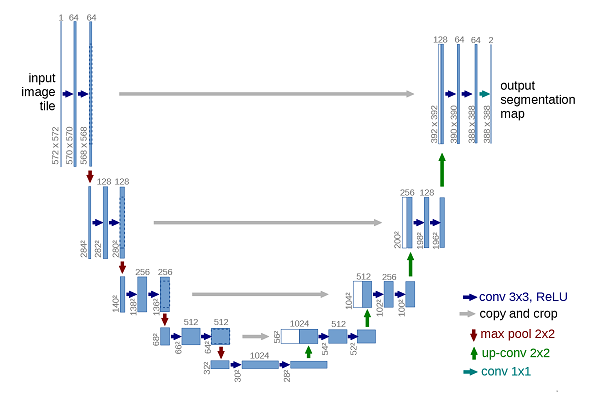

Với báo cáo này, mạng Unet được em sử dụng là mạng Unet được chỉnh sửa bằng cách thay thế các khối convolution thành khối residual đơn giản.

In [ ]:
def BatchActivate(x):
    #chuẩn hoá dữ liệu sao cho có mean = 0 và độ lệch chuẩn = 1
    x = BatchNormalization()(x)
    #hàm kích hoạt Relu
    x = Activation('relu')(x)
    return x

#định nghĩa block convolution.
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    if activation == True:
        x = BatchActivate(x)
    return x

#định nghĩa block residual
def residual_block(blockInput, num_filters=16, batch_activate = False):
    x = BatchActivate(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    if batch_activate:
        x = BatchActivate(x)
    return x

In [ ]:
size = (3, 3)
def build_model(input_layer, start_neurons, DropoutRatio = 0.5):
    #encoder
    #Giảm kích thước ảnh từ 101 -> 50
    conv1 = Conv2D(start_neurons * 1, size, activation="relu", padding="same")(input_layer)
    conv1 = residual_block(conv1,start_neurons * 1)
    conv1 = residual_block(conv1,start_neurons * 1, True)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(DropoutRatio/2)(pool1)

    #Giảm kích thước ảnh từ 50 -> 25
    conv2 = Conv2D(start_neurons * 2, size, activation=None, padding="same")(pool1)
    conv2 = residual_block(conv2,start_neurons * 2)
    conv2 = residual_block(conv2,start_neurons * 2, True)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(DropoutRatio)(pool2)

    #Giảm kích thước ảnh từ 25 -> 12
    conv3 = Conv2D(start_neurons * 4, size, activation=None, padding="same")(pool2)
    conv3 = residual_block(conv3,start_neurons * 4)
    conv3 = residual_block(conv3,start_neurons * 4, True)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(DropoutRatio)(pool3)

    #Giảm kích thước ảnh từ  12 -> 6
    conv4 = Conv2D(start_neurons * 8, size, activation=None, padding="same")(pool3)
    conv4 = residual_block(conv4,start_neurons * 8)
    conv4 = residual_block(conv4,start_neurons * 8, True)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(DropoutRatio)(pool4)

    # Middle
    convm = Conv2D(start_neurons * 16, size, activation=None, padding="same")(pool4)
    convm = residual_block(convm,start_neurons * 16)
    convm = residual_block(convm,start_neurons * 16, True)
    
    #decoder
    #Tăng kích thước ảnh từ 6 -> 12
    deconv4 = Conv2DTranspose(start_neurons * 8, size, strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(DropoutRatio)(uconv4)
    
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv4)
    uconv4 = residual_block(uconv4,start_neurons * 8)
    uconv4 = residual_block(uconv4,start_neurons * 8, True)
    
    #Tăng kích thước ảnh từ 12 -> 25
    #deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    deconv3 = Conv2DTranspose(start_neurons * 4, size, strides=(2, 2), padding="valid")(uconv4)
    uconv3 = concatenate([deconv3, conv3])    
    uconv3 = Dropout(DropoutRatio)(uconv3)
    
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = residual_block(uconv3,start_neurons * 4)
    uconv3 = residual_block(uconv3,start_neurons * 4, True)

    #Tăng kích thước ảnh từ 25 -> 50
    deconv2 = Conv2DTranspose(start_neurons * 2, size, strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
        
    uconv2 = Dropout(DropoutRatio)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = residual_block(uconv2,start_neurons * 2)
    uconv2 = residual_block(uconv2,start_neurons * 2, True)
    
    #Tăng kích thước ảnh từ 50 -> 101
    #deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    deconv1 = Conv2DTranspose(start_neurons * 1, size, strides=(2, 2), padding="valid")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    
    uconv1 = Dropout(DropoutRatio)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = residual_block(uconv1,start_neurons * 1)
    uconv1 = residual_block(uconv1,start_neurons * 1, True)
    
    #uconv1 = Dropout(DropoutRatio/2)(uconv1)
    #output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)
    output_layer_noActi = Conv2D(1, (1,1), padding="same", activation=None)(uconv1)
    output_layer =  Activation('sigmoid')(output_layer_noActi)
    
    return output_layer

2. Mạng Resnet34:

    Mạng Resnet34 được sử dụng làm encoder cho mạng Unet ở trên, phần decoder của mạng Unet sẽ sử dụng các khối resnet đơn giản như mô tả ở trên.

In [ ]:
# https://github.com/raghakot/keras-resnet/blob/master/resnet.py

#xây dựng batch_normalization -> khối relu
def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)
    return Activation("relu")(norm)

#xây dựng một khối convolution -> batch normalization -> khối relu 
def _conv_bn_relu(**conv_params):
    """Helper to build a conv -> BN -> relu block
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        conv = Conv2D(filters=filters, kernel_size=kernel_size,
                      strides=strides, padding=padding,
                      kernel_initializer=kernel_initializer,
                      kernel_regularizer=kernel_regularizer)(input)
        return _bn_relu(conv)

    return f

#xây dựng batch normalization -> khối relu -> khối convolution
def _bn_relu_conv(**conv_params):
    """Helper to build a BN -> relu -> conv block.
    This is an improved scheme proposed in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        activation = _bn_relu(input)
        return Conv2D(filters=filters, kernel_size=kernel_size,
                      strides=strides, padding=padding,
                      kernel_initializer=kernel_initializer,
                      kernel_regularizer=kernel_regularizer)(activation)

    return f


def _shortcut(input, residual):
    """Adds a shortcut between input and residual block and merges them with "sum"
    """
    # Expand channels of shortcut to match residual.
    # Stride appropriately to match residual (width, height)
    # Should be int if network architecture is correctly configured.
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_width = int(round(input_shape[ROW_AXIS] / residual_shape[ROW_AXIS]))
    stride_height = int(round(input_shape[COL_AXIS] / residual_shape[COL_AXIS]))
    equal_channels = input_shape[CHANNEL_AXIS] == residual_shape[CHANNEL_AXIS]

    shortcut = input
    # 1 X 1 conv if shape is different. Else identity.
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        shortcut = Conv2D(filters=residual_shape[CHANNEL_AXIS],
                          kernel_size=(1, 1),
                          strides=(stride_width, stride_height),
                          padding="valid",
                          kernel_initializer="he_normal",
                          kernel_regularizer=l2(0.0001))(input)

    return add([shortcut, residual])


#định nghĩa khối convolution 3x3 để sử dụng cho model Resnet34
def basic_block(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Basic 3 X 3 convolution blocks for use on resnets with layers <= 34.
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv1 = Conv2D(filters=filters, kernel_size=(3, 3),
                           strides=init_strides,
                           padding="same",
                           kernel_initializer="he_normal",
                           kernel_regularizer=l2(1e-4))(input)
        else:
            conv1 = _bn_relu_conv(filters=filters, kernel_size=(3, 3),
                                  strides=init_strides)(input)

        residual = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv1)
        return _shortcut(input, residual)

    return f

#định nghĩa khối residual
def _residual_block(block_function, filters, repetitions, is_first_layer=False):
    """Builds a residual block with repeating bottleneck blocks.
    """
    def f(input):
        for i in range(repetitions):
            init_strides = (1, 1)
            if i == 0 and not is_first_layer:
                init_strides = (2, 2)
            input = block_function(filters=filters, init_strides=init_strides,
                                   is_first_block_of_first_layer=(is_first_layer and i == 0))(input)
        return input

    return f

def _handle_dim_ordering():
    global ROW_AXIS
    global COL_AXIS
    global CHANNEL_AXIS
    if K.image_data_format() == 'channels_last':
        ROW_AXIS = 1
        COL_AXIS = 2
        CHANNEL_AXIS = 3
    else:
        CHANNEL_AXIS = 1
        ROW_AXIS = 2
        COL_AXIS = 3


def _get_block(identifier):
    if isinstance(identifier, six.string_types):
        res = globals().get(identifier)
        if not res:
            raise ValueError('Invalid {}'.format(identifier))
        return res
    return identifier

# định nghĩa mạng resnet
class ResnetBuilder(object):
    @staticmethod
    def build(input_shape, block_fn, repetitions,input_tensor):
        _handle_dim_ordering()
        if len(input_shape) != 3:
            raise Exception("Input shape should be a tuple (nb_channels, nb_rows, nb_cols)")

        # Permute dimension order if necessary
        if K.image_data_format()  == 'channels_last':
            input_shape = (input_shape[1], input_shape[2], input_shape[0])

        # Load function from str if needed.
        block_fn = _get_block(block_fn)
        
        if input_tensor is None:
            img_input = Input(shape=input_shape)
        else:
            if not K.is_keras_tensor(input_tensor):
                img_input = Input(tensor=input_tensor, shape=input_shape)
            else:
                img_input = input_tensor
                
        conv1 = _conv_bn_relu(filters=64, kernel_size=(7, 7), strides=(2, 2))(img_input)
        pool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(conv1)

        block = pool1
        filters = 64
        for i, r in enumerate(repetitions):
            block = _residual_block(block_fn, filters=filters, repetitions=r, is_first_layer=(i == 0))(block)
            filters *= 2

        # Last activation
        block = _bn_relu(block)

        model = Model(inputs=img_input, outputs=block)
        return model

    @staticmethod
    def build_resnet_34(input_shape,input_tensor):
        return ResnetBuilder.build(input_shape, basic_block, [3, 4, 6, 3],input_tensor)

# IV. Huấn luyện và đánh giá:

1. Chỉ số đánh giá:

    Chỉ số đánh giá trong báo cáo được em sử dụng là chỉ số IoU (Intersection over Union) được sử dụng và đề cập tới trong phần [Evaluation](https://www.kaggle.com/c/tgs-salt-identification-challenge/overview/evaluation) của cuộc thi.

    Kết quả của báo cáo sẽ được tính bằng độ chính xác trung bình tại các ngưỡng IoU khác nhau. Chỉ số IoU của một tập hợp đối tượng pixel và một tập hợp các đối tượng pixel thật được tính bằng công thức: 

    $$
    IoU(A,B) = \frac{A\cap B} {A\cup B}
    $$

    Chỉ số quét qua một loạt các ngưỡng IoU, ở mỗi điểm sẽ tính toán một giá trị chính xác trung bình. Các giá trị ngưỡng nằm trong khoảng từ 0.5 đến 0.95 với kích thước bước là 0.05: (0.5, 0.55, 0.6, ..., 0.85, 0.9, 0.95), Nói cách khác, với ngưỡng 0.5, một đối tượng được dự đoán là đúng nếu IoU của đối tượng đó với một đối tượng ground truth là lớn hơn 0.5.

    Ở mỗi giá trị ngưỡng t, một giá trị chính xác được tính toán dựa trên số lượng true positive (TP), false negative (FN), false positive (FP) do so sánh từ đối tượng dự đoán tới tất cả đối tượng ground truth:

    $$
    \frac{TP(t)} {TP(t) + FP(t) + FN(t)}
    $$

    TP được tính khi một đối tượng dự đoán duy nhất khớp với một đối tượng ground truth  với một IoU ở trên ngưỡng. Một FP chỉ ra rằng đối tượng dự đoán ko có quan hệ với đối tượng ground truth tương ứng. Một FN chỉ ra rằng một đối tượng ground truth không có quan hệ với đối tượng dự đoán tương ứng. Độ chính xác trung bình của một ảnh sau đó được tính bằng giá trị trung bình của các giá trị chính xác ở trên với mỗi ngưỡng IoU:

    $$
    \frac {1} {|threshold|} \sum_{t} \frac{TP(t)} {TP(t) + FP(t) + FN(t)}
    $$

    Cuối cùng, điểm số được trả về bởi cuộc thi là giá trị trung bình được lấy trên các mức chính xác trung bình của từng ảnh trong tập test.

2. Hàm tối ưu:

    Hàm tối ưu được chọn cho báo cáo là hàm Adam

In [ ]:
def get_iou_vector(A, B):
    batch_size = A.shape[0]
    metric = []
    for batch in range(batch_size):
        t, p = A[batch], B[batch]
#         if np.count_nonzero(t) == 0 and np.nt_nonzero(p) > 0:
#             metric.append(0)
#             continue
#         if np.count_nonzero(t) >= 1 and np.count_nonzero(p) == 0:
#             metric.append(0)
#             continue
#         if np.count_nonzero(t) == 0 and np.count_nonzero(p) == 0:
#             metric.append(1)
#             continue
        
        intersection = np.logical_and(t, p)
        union = np.logical_or(t, p)
        iou = (np.sum(intersection > 0) + 1e-10 )/ (np.sum(union > 0) + 1e-10)
        thresholds = np.arange(0.5, 1, 0.05)
        s = []
        for thresh in thresholds:
            s.append(iou > thresh)
        metric.append(np.mean(s))

    return np.mean(metric)

def my_iou_metric(label, pred):
    return tf.py_function(get_iou_vector, [label, pred > 0.3], tf.float64)#change 0.5 >> 0.7

def my_iou_metric_2(label, pred):
    return tf.py_function(get_iou_vector, [label, pred > 0.1], tf.float64)#change 0.0 >> 0.5

3. Hàm Loss: 

    Hàm loss được sử dụng cho báo cáo là hàm Binary Cross Entropy kết hợp với hàm Lovasz Softmax. Hàm Lovasz Softmax là một hàm loss thay thế được sử dụng cho IoU đã được tối ưu hoá. Tuy nhiên quá trình huấn luyện với hàm loss này rất chậm, việc kết hợp với hàm Binary Cross Entropy ở trên đẩy nhanh quá trình huấn luyện.Hàm Lovasz Softmax là một hàm loss thay thế được sử dụng cho IoU đã được tối ưu hoá. Tuy nhiên quá trình huấn luyện với hàm loss này rất chậm, việc kết hợp với hàm Binary Cross Entropy ở trên đẩy nhanh quá trình huấn luyện.


In [ ]:
# code download from: https://github.com/bermanmaxim/LovaszSoftmax
def _cumsum(x, axis=None):
    return np.cumsum(x, axis=axis)

def lovasz_grad(gt_sorted):
    """
    Computes gradient of the Lovasz extension w.r.t sorted errors
    See Alg. 1 in paper
    """
    gts = tf.reduce_sum(gt_sorted)
    
    # intersection = gts - tf.cumsum(gt_sorted)
    intersection = gts - tf.py_function(_cumsum,[gt_sorted],tf.float32)
    # union = gts + tf.cumsum(1. - gt_sorted)
    union = gts + tf.py_function(_cumsum,[1. - gt_sorted],tf.float32)
    jaccard = 1. - intersection / union
    jaccard = tf.concat((jaccard[0:1], jaccard[1:] - jaccard[:-1]), 0)
    return jaccard


# --------------------------- BINARY LOSSES ---------------------------


def lovasz_hinge(logits, labels, per_image=True, ignore=None):
    """
    Binary Lovasz hinge loss
      logits: [B, H, W] Variable, logits at each pixel (between -\infty and +\infty)
      labels: [B, H, W] Tensor, binary ground truth masks (0 or 1)
      per_image: compute the loss per image instead of per batch
      ignore: void class id
    """
    if per_image:
        def treat_image(log_lab):
            log, lab = log_lab
            log, lab = tf.expand_dims(log, 0), tf.expand_dims(lab, 0)
            log, lab = flatten_binary_scores(log, lab, ignore)
            return lovasz_hinge_flat(log, lab)
        losses = tf.map_fn(treat_image, (logits, labels), dtype=tf.float32)
        loss = tf.reduce_mean(losses)
    else:
        loss = lovasz_hinge_flat(*flatten_binary_scores(logits, labels, ignore))
    return loss


def lovasz_hinge_flat(logits, labels):
    """
    Binary Lovasz hinge loss
      logits: [P] Variable, logits at each prediction (between -\infty and +\infty)
      labels: [P] Tensor, binary ground truth labels (0 or 1)
      ignore: label to ignore
    """

    def compute_loss():
        labelsf = tf.cast(labels, logits.dtype)
        signs = 2. * labelsf - 1.
        errors = 1. - logits * tf.stop_gradient(signs)
        errors_sorted, perm = tf.nn.top_k(errors, k=tf.shape(errors)[0], name="descending_sort")
        gt_sorted = tf.gather(labelsf, perm)
        grad = lovasz_grad(gt_sorted)
        loss = tf.tensordot(tf.nn.relu(errors_sorted), tf.stop_gradient(grad), 1, name="loss_non_void")
        return loss

    # deal with the void prediction case (only void pixels)
    loss = tf.cond(tf.equal(tf.shape(logits)[0], 0),
                   lambda: tf.reduce_sum(logits) * 0.,
                   compute_loss,
                   #strict=True,
                   name="loss"
                   )
    return loss


def flatten_binary_scores(scores, labels, ignore=None):
    """
    Flattens predictions in the batch (binary case)
    Remove labels equal to 'ignore'
    """
    scores = tf.reshape(scores, (-1,))
    labels = tf.reshape(labels, (-1,))
    if ignore is None:
        return scores, labels
    valid = tf.not_equal(labels, ignore)
    vscores = tf.boolean_mask(scores, valid, name='valid_scores')
    vlabels = tf.boolean_mask(labels, valid, name='valid_labels')
    return vscores, vlabels


def lovasz_loss(y_true, y_pred):
    y_true, y_pred = K.cast(K.squeeze(y_true, -1), 'int32'), K.cast(K.squeeze(y_pred, -1), 'float32')
    #logits = K.log(y_pred / (1. - y_pred))
    logits = y_pred #Jiaxin
    loss = lovasz_hinge(logits, y_true, per_image = True, ignore = None)
    return loss

4. Huấn luyện:

    Việc huấn luyện mô hình được chia làm hai bước, bước một em sẽ huấn luyện mô hình Resnet34 kết hợp với mạng Unet với hàm loss là Binary Cross Entropy và bước hai em sẽ dùng weight của model ở bước trước và tiếp tục huấn luyện với hàm loss là hàm Lovasz Softmax. 

    a. Huấn luyện mô hình với Binary Cross Entropy:
        
      Đầu tiên em định nghĩa hàm xây dựng mạng Resnet34 với hàm loss là Binary Cross Entropy và hàm tối ưu là Adam.

In [ ]:
def UResNet34(input_shape=(128, 128, 1), classes=1, decoder_filters=16, decoder_block_type='upsampling',
                       encoder_weights="imagenet", input_tensor=None, activation='sigmoid', **kwargs):

    backbone = ResnetBuilder.build_resnet_34(input_shape=input_shape,input_tensor=input_tensor)
    
    input_layer = backbone.input
    output_layer = build_model(input_layer, 16,0.5) 
    model = Model(input_layer, output_layer)

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=[my_iou_metric])

    return model

Sau đó em định nghĩa mô hình Resnet34 để chuẩn bị cho việc huấn luyện mô hình lần đầu tiên.

In [ ]:
model1 = UResNet34( input_shape = (1,img_size,img_size))
model1.summary()

Tiếp theo em đưa dữ liệu vào model để thực hiện việc huấn luyện. 

In [ ]:
#dừng việc huấn luyện sau 10 epoch khi chỉ số iou không tăng thêm
early_stopping = EarlyStopping(monitor='my_iou_metric', mode = 'max',patience=10, verbose=1)
#lưu lại trọng số của model mà chỉ số iou cao nhất
model_checkpoint = ModelCheckpoint(model_path,monitor='my_iou_metric',
                                   mode = 'max', save_best_only=True, verbose=1)
#điều chỉnh learning rate giảm 0.5 nếu chỉ số iou không được cải thiện sai 5 epoch 
reduce_lr = ReduceLROnPlateau(monitor='my_iou_metric', mode = 'max',factor=0.5, patience=5, min_lr=0.0001, verbose=1)

history = model1.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid), 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint,reduce_lr], 
                    verbose=1)

b. Huấn luyện mô hình với hàm Lovasz Softmax:

In [ ]:
#load model đã train ở bước trước:
model1 = load_model(model_path,custom_objects={'my_iou_metric': my_iou_metric})
# sử dụng input layer của model đã train
input_x = model1.layers[0].input
#active 
output_layer = model1.layers[-1].input
model = Model(input_x, output_layer)

model.compile(loss=lovasz_loss, optimizer='adam', metrics=[my_iou_metric_2])
model.summary()

Nhận xét: Hàm lovasz_loss lấy input trong khoảng (-∞，+∞),vì thế nó sẽ loại bỏ hàm kích hoạt sigmoid ở cuối trong mạng. Lúc này ngưỡng mặc định cho việc dự đoán pixel là 0 thay vì 0,5.
Sau đó em huấn luyện mô hình vừa định nghĩa.

In [ ]:
#dừng việc huấn luyện sau 10 epoch khi chỉ số iou không tăng thêm
early_stopping = EarlyStopping(monitor='val_my_iou_metric_2', mode = 'max',patience=20, verbose=1)
#lưu lại trọng số của model mà chỉ số iou cao nhất
model_checkpoint = ModelCheckpoint(model_path,monitor='val_my_iou_metric_2', 
                                   mode = 'max', save_best_only=True, verbose=1)
#điều chỉnh learning rate giảm 0.5 nếu chỉ số iou không được cải thiện sai 5 epoch 
reduce_lr = ReduceLROnPlateau(monitor='val_my_iou_metric_2', mode = 'max',factor=0.5, patience=5, min_lr=0.0001, verbose=1)

history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid), 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint,reduce_lr,early_stopping], 
                    verbose=1)

5. Dự đoán và đánh giá mô hình:

    Đầu tiên em sẽ viết hàm dự đoán dữ liệu masking từ model đã được train ở phần trước.

In [ ]:
#hàm dự đoán masking
def predict_result(model,x_test,img_size): # predict both orginal and reflect x
    x_test_reflect =  np.array([np.fliplr(x) for x in x_test])
    preds_test = model.predict(x_test).reshape(-1, img_size, img_size)
    preds_test2_refect = model.predict(x_test_reflect).reshape(-1, img_size, img_size)
    preds_test += np.array([ np.fliplr(x) for x in preds_test2_refect] )
    return preds_test

Sau đó em load model và thực hiện việc dự đoán cho tập validation.

In [ ]:
#load model đã huấn luyện ở phần trước
model = load_model(model_path,custom_objects={'my_iou_metric_2': my_iou_metric_2, 'lovasz_loss': lovasz_loss})
#dự đoán masking cho tập validation
preds_valid = predict_result(model,x_valid,img_size)

Tiếp theo em thực hiện việc tính toán ngưỡng giá trị tối ưu để dự đoán pixel.

In [ ]:
#Tính toán chỉ số của mô hình và tối ưu ngưỡng giá trị bằng IoU tốt nhất
# src: https://www.kaggle.com/aglotero/another-iou-metric
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in


    true_objects = 2
    pred_objects = 2

    #  if all zeros, original code  generate wrong  bins [-0.5 0 0.5],
    temp1 = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=([0,0.5,1], [0,0.5, 1]))
#     temp1 = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))
    #print(temp1)
    intersection = temp1[0]
    #print("temp2 = ",temp1[1])
    #print(intersection.shape)
   # print(intersection)
    # Compute areas (needed for finding the union between all objects)
    #print(np.histogram(labels, bins = true_objects))
    area_true = np.histogram(labels,bins=[0,0.5,1])[0]
    #print("area_true = ",area_true)
    area_pred = np.histogram(y_pred, bins=[0,0.5,1])[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Tính union
    union = area_true + area_pred - intersection
  
    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    intersection[intersection == 0] = 1e-9
    
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Tính chỉ số IoU
    iou = intersection / union

    # Hàm tính độ chính xác
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Lặp qua các ngưỡng IoU
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [ ]:
##Tính toán chỉ số cho model, chọn ngưỡng bằng dữ liệu validation
thresholds_ori = np.linspace(0.3, 0.7, 31)
# Reverse sigmoid function: Use code below because the  sigmoid activation was removed
thresholds = np.log(thresholds_ori/(1-thresholds_ori)) 

# ious = np.array([get_iou_vector(y_valid, preds_valid > threshold) for threshold in tqdm_notebook(thresholds)])
# print(ious)
ious = np.array([iou_metric_batch(y_valid, preds_valid > threshold) for threshold in tqdm(thresholds)])
print(ious)

In [ ]:
# Tìm ngưỡng tốt nhất bằng dữ liệu validate.
threshold_best_index = np.argmax(ious) 
iou_best = ious[threshold_best_index]
threshold_best = thresholds[threshold_best_index]

plt.plot(thresholds, ious)
plt.plot(threshold_best, iou_best, "xr", label="Best threshold")
plt.xlabel("Threshold")
plt.ylabel("IoU")
plt.title("Threshold vs IoU ({}, {})".format(threshold_best, iou_best))
plt.legend()

Tiếp theo em thực hiện việc visualize việc dự đoán masking của một số ảnh trong tập validation.

In [ ]:
#hiển thị ảnh
plt.figure(figsize=(10, 10))
j = 1
for i in range(5): 
    #hiển thị cả 3 ảnh: ảnh ban đầu, ảnh rle_mask của ảnh ban đầu và sau khi masking
    random_num = randint(1, 100);
    plt.subplot(5,3,j)
    plt.imshow(x_valid[i+random_num], cmap="gray")
    plt.subplot(5,3,j+1)
    plt.imshow(x_valid[i+random_num].squeeze(), cmap="gray")
    plt.imshow(y_valid[i+random_num].squeeze(), alpha=0.5, cmap="Greens")
    plt.subplot(5,3,j+2)
    plt.imshow(x_valid[i+random_num].squeeze(), cmap="gray")
    plt.imshow(preds_valid[i+random_num].squeeze(), alpha = 0.3, cmap="OrRd")
    j = j+3
plt.suptitle('Image Masking Visualization', fontsize=20);

Nhận xét: Ảnh bên trái là ảnh gốc, ảnh ở giữa là ảnh masking của ảnh tương ứng và ảnh bên trái là ảnh masking do model dự đoán. Các mask được dự đoán gần chính xác so với masking thực tế. 

Tiếp theo em sẽ viết hàm để chuyển đổi những masking thành các chuỗi có dạng giống dữ liệu rle_mask của tập train.

In [ ]:
#hàm chuyển đổi ảnh masking thành rle_mask
def rle_encode(im):
    '''
    im: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = im.flatten(order = 'F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

Nhận xét: Với việc định dạng của file submission.csv để đánh giá kết quả của báo cáo giống với định dạng của file train.csv, bao gồm id của ảnh và rle_mask cho ảnh, hàm rle_encode sẽ biến những ảnh masking thành định dạng chuỗi giống với dữ liệu trong cột rle_mask của file train.csv.

In [ ]:
#thực hiện việc load ảnh của tập test vào dataframe giống bước tiền xử lý dữ liệu.
x_test = np.array([(np.array(load_img(image_test_path+"{}.png".format(idx), color_mode="grayscale"))) / 255 for idx in tqdm(test.id)]).reshape(-1, img_size, img_size, 1)

Tiếp theo em thực hiện việc dự đoán ảnh masking cho các ảnh trong tập test và chuyển những ảnh masking đó về dạng rle_mask cho file submission.

In [ ]:
preds_test = predict_result(model,x_test,img_size)
t1 = time.time()
pred_dict = {idx: rle_encode(np.round(preds_test[i]) > threshold_best) for i, idx in enumerate(tqdm(test.id.values))}
t2 = time.time()

print(f"Usedtime = {t2-t1} s")

Cuối cùng em thực hiện việc tạo file submission.csv để nộp lấy kết quả của báo cáo.

In [ ]:
#xoá 2 folder train và test ở folder working để submit file csv
!rm -r /kaggle/working/train
!rm -r /kaggle/working/test

In [ ]:
submit = pd.DataFrame.from_dict(pred_dict,orient='index')
submit.index.names = ['id']
submit.columns = ['rle_mask']
submit.to_csv(submission_file)